In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import lstm
from utils import calculate_f1_macro

In [ ]:
(x_train, y_train), (x_val, y_val), (x_test, y_test), num_classes, vocab_size, text_vectorizer = load_and_preprocess_nusax_sentiment(max_features=10000, maxlen=200)

Loading NusaX sentiment data...
Labels encoded. Classes: ['negative' 'neutral' 'positive'] -> [0 1 2]
Vocabulary size: 2836 (max_features was 10000)
x_train shape: (500, 200), y_train shape: (500,)
x_val shape: (100, 200), y_val shape: (100,)
x_test shape: (400, 200), y_test shape: (400,)
Number of classes: 3



Training a default Keras LSTM model...

--- Training LSTM: DefaultKeras ---
LSTM Configs: [{'units': 64, 'bidirectional': True, 'return_sequences': False}], Dropout: 0.5


/home/qika/Code/Python Env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "Keras_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bi_lstm_1 (Bidirectional)       │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 462,211 (1.76 MB)

 Trainable params: 462,211 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.4218 - loss: 1.0865 - val_accuracy: 0.4200 - val_loss: 1.0685
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.4582 - loss: 1.0499 - val_accuracy: 0.5100 - val_loss: 1.0204
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.5093 - loss: 0.9866 - val_accuracy: 0.5500 - val_loss: 0.9606
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.6011 - loss: 0.8711 - val_accuracy: 0.5300 - val_loss: 0.9159
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.6655 - loss: 0.7616 - val_accuracy: 0.5400 - val_loss: 0.8821
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.7277 - loss: 0.6973 - val_accuracy: 0.6200 - val_loss: 0.7960
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.8551 - loss: 0.5576 - val_accuracy: 0.7100 - val_loss: 0.7331
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.9284 - loss: 0.3888 - val_accuracy: 0.6800 - val_loss:

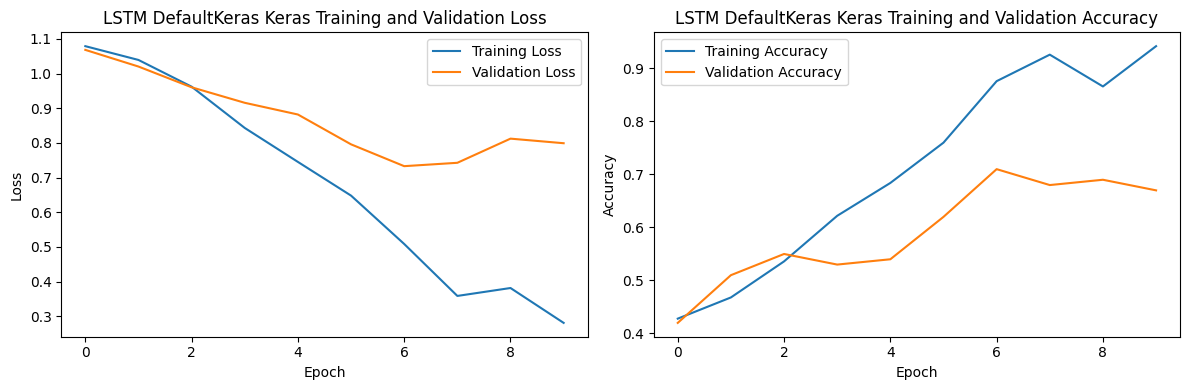

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
Test Accuracy (Keras LSTM DefaultKeras): 0.6825
Macro F1-Score (Keras LSTM DefaultKeras): 0.6695


In [10]:
print("\nTraining a default Keras LSTM model...")
default_lstm_config = [{'units': 64, 'bidirectional': True, 'return_sequences': False}]
keras_model_instance, f1_keras, _ = lstm.train_and_evaluate_lstm_variant(
        x_train, y_train, x_val, y_val, x_test, y_test, num_classes, vocab_size, 
        lstm.EMBEDDING_DIM, lstm.MAX_LEN, default_lstm_config, epochs=10, description="DefaultKeras"
)
keras_model_instance.save("default_lstm_model.keras")

In [12]:
print("\n--- Manual LSTM Forward Propagation Test ---")
manual_lstm = lstm.LSTMFromScratch()
manual_lstm.load_keras_model(keras_model_instance)

y_pred_keras_sample = keras_model_instance.predict(x_val)
y_pred_manual_sample = manual_lstm.predict(x_val)

print(f"Keras preds (sample sum): {np.sum(y_pred_keras_sample)}")
print(f"Manual preds (sample sum): {np.sum(y_pred_manual_sample)}")
abs_diff = np.sum(np.abs(y_pred_keras_sample - y_pred_manual_sample))
print(f"Sum of absolute differences (sample): {abs_diff:.6f}")
assert abs_diff < 1e-3, "Manual LSTM forward pass significantly different from Keras!"

f1_keras_sample = calculate_f1_macro(y_val, y_pred_keras_sample)
f1_manual_sample = calculate_f1_macro(y_val, y_pred_manual_sample)
print(f"F1 Keras: {f1_keras_sample:.4f}")
print(f"F1 Manual: {f1_manual_sample:.4f}")


--- Manual LSTM Forward Propagation Test ---
Processing Keras layer: embedding of type <class 'keras.src.layers.core.embedding.Embedding'>
Processing Keras layer: bi_lstm_1 of type <class 'keras.src.layers.rnn.bidirectional.Bidirectional'>
Processing Keras layer: dropout of type <class 'keras.src.layers.regularization.dropout.Dropout'>
Ignoring Dropout layer: dropout during manual inference/training.
Processing Keras layer: output_dense of type <class 'keras.src.layers.core.dense.Dense'>
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Keras preds (sample sum): 100.0
Manual preds (sample sum): 100.0
Sum of absolute differences (sample): 0.000019
F1 Keras: 0.6436
F1 Manual: 0.6436


In [ ]:
print("\n--- Manual LSTM Backward Propagation & Training Test (Bonus) ---")

simpler_config = [{'units': 8, 'bidirectional': False, 'return_sequences': False}] # Very small
simpler_keras_model = lstm.build_lstm_model(vocab_size, lstm.EMBEDDING_DIM, lstm.MAX_LEN, num_classes, simpler_config)
simpler_keras_model.build(input_shape=(None, lstm.MAX_LEN)) 

manual_lstm_train = lstm.LSTMFromScratch()
manual_lstm_train.load_keras_model(simpler_keras_model)

loss_func = lstm.ManualSparseCategoricalCrossentropy()
optimizer = lstm.ManualSGD(learning_rate=0.01)
manual_lstm_train.compile_manual(loss_fn_instance=loss_func, optimizer_instance=optimizer)

print("Starting manual training with LSTMFromScratch...")
x_train_tiny = x_train
y_train_tiny = y_train
try:
    manual_lstm_train.fit_manual(x_train_tiny, y_train_tiny, epochs=1, batch_size=8)
    print("Manual training epoch completed.")
    
    y_pred_manual_after_train = manual_lstm_train.predict(x_val)
    f1_manual_after_train = calculate_f1_macro(y_val, y_pred_manual_after_train)
    print(f"F1 Manual (sample) after 1 epoch of manual training: {f1_manual_after_train:.4f}")

except NotImplementedError as e:
    print(f"Could not run manual training: {e}")
except Exception as e:
    print(f"An error occurred during manual training test: {e}")


--- Manual LSTM Backward Propagation & Training Test (Bonus) ---
Processing Keras layer: embedding of type <class 'keras.src.layers.core.embedding.Embedding'>
Processing Keras layer: lstm_1 of type <class 'keras.src.layers.rnn.lstm.LSTM'>
Processing Keras layer: dropout of type <class 'keras.src.layers.regularization.dropout.Dropout'>
Ignoring Dropout layer: dropout during manual inference/training.
Processing Keras layer: output_dense of type <class 'keras.src.layers.core.dense.Dense'>
Starting manual training with LSTMFromScratch...
An error occurred during manual training test: Only integers, slices (`:`), ellipsis (`...`), tf.newaxis (`None`) and scalar tf.int32/tf.int64 tensors are valid indices, got array([ 35, 396, 278, 124, 436, 496, 141, 157,  50, 130,  90, 237, 443,
       256, 343,  61, 428, 149, 253, 365, 148, 460, 229, 136,  66, 291,
       246, 244, 139, 402, 194, 274, 198, 233,  81, 101, 129, 367,  87,
        37, 394,  38, 385,  28, 208, 180, 207, 285, 269, 331, 473,  

/home/qika/Code/Python Env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
